In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import pathlib

df = pd.DataFrame()
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')

for csv in pathlib.Path('./Datasets/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv, index_col=0, parse_dates=['Start'], date_parser=dateparse)
    temp_df['Dataset'] = csv.stem   
    df = pd.concat([df,temp_df])
print('Data loading complete!')

df.to_csv("df_eda_out.csv")

Loading dataset: Austria, APG CA  MBA
Loading dataset: Belgium, Elia BZ  CA  MBA
Loading dataset: Bulgaria, ESO BZ  CA  MBA
Loading dataset: Croatia, HOPS BZ  CA  MBA
Loading dataset: Czech Republic, CEPS BZ  CA  MBA
Loading dataset: DE-LU MBA
Loading dataset: DK1 BZ  MBA
Loading dataset: DK2 BZ  MBA
Loading dataset: Estonia, Elering BZ  CA  MBA
Loading dataset: Finland, Fingrid BZ  CA  MBA
Loading dataset: France, RTE BZ  CA  MBA
Loading dataset: Greece, IPTO BZ  CA MBA
Loading dataset: Hungary, MAVIR CA  BZ  MBA
Loading dataset: Ireland (SEM) BZ  MBA
Loading dataset: IT-Centre-North BZ
Loading dataset: IT-Centre-South BZ
Loading dataset: IT-North BZ
Loading dataset: IT-Sardinia BZ
Loading dataset: IT-Sicily BZ
Loading dataset: IT-South BZ
Loading dataset: Latvia, AST BZ  CA  MBA
Loading dataset: Lithuania, Litgrid BZ  CA  MBA
Loading dataset: Netherlands, TenneT NL BZ  CA MBA
Loading dataset: NO1 BZ  MBA
Loading dataset: NO2 BZ  MBA
Loading dataset: NO3 BZ  MBA
Loading dataset: NO4 B

In [3]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

df['Date'] = df['Start'].dt.date
df['Time'] = df['Start'].dt.time
df['Year'] = df['Start'].dt.year
df['Month'] = df['Start'].dt.month
df['Day'] = df['Start'].dt.day
df['Hour'] = df['Start'].dt.hour
df['Minute'] = df['Start'].dt.minute
# df['Second'] = df['Start'].second
df["Weekday"] = df['Start'].dt.weekday
df["Weekend"] = df['Start'].dt.weekday >= 5
df['Holiday'] = df['Start'].dt.date.astype('datetime64').isin(calendar().holidays())

df.loc[df['Holiday']==True]

,Start,Load,Price,Dataset,Date,Time,Year,Month,Day,Hour,Minute,Weekday,Weekend,Holiday
4324,2015-05-25 00:00:00+00:00,4346.0,30.34,"Austria, APG CA MBA",2015-05-25,00:00:00,2015,5,25,0,0,0,False,True
4325,2015-05-25 00:15:00+00:00,4306.0,16.35,"Austria, APG CA MBA",2015-05-25,00:15:00,2015,5,25,0,15,0,False,True
4326,2015-05-25 00:30:00+00:00,4212.0,13.10,"Austria, APG CA MBA",2015-05-25,00:30:00,2015,5,25,0,30,0,False,True
4327,2015-05-25 00:45:00+00:00,4229.0,13.03,"Austria, APG CA MBA",2015-05-25,00:45:00,2015,5,25,0,45,0,False,True
4328,2015-05-25 01:00:00+00:00,4060.0,26.02,"Austria, APG CA MBA",2015-05-25,01:00:00,2015,5,25,1,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,2021-02-15 19:00:00+00:00,21176.0,2048.00,Ukraine IPS CTA,2021-02-15,19:00:00,2021,2,15,19,0,0,False,True
10698,2021-02-15 20:00:00+00:00,21014.0,2048.00,Ukraine IPS CTA,2021-02-15,20:00:00,2021,2,15,20,0,0,False,True
10699,2021-02-15 21:00:00+00:00,20237.0,2048.00,Ukraine IPS CTA,2021-02-15,21:00:00,2021,2,15,21,0,0,False,True
10700,2021-02-15 22:00:00+00:00,19353.0,1229.00,Ukraine IPS CTA,2021-02-15,22:00:00,2021,2,15,22,0,0,False,True


In [4]:
#  debug cell
print(len(df['Dataset'].unique()))
print(df['Dataset'].unique())

df.tail()

42
['Austria, APG CA  MBA' 'Belgium, Elia BZ  CA  MBA'
 'Bulgaria, ESO BZ  CA  MBA' 'Croatia, HOPS BZ  CA  MBA'
 'Czech Republic, CEPS BZ  CA  MBA' 'DE-LU MBA' 'DK1 BZ  MBA'
 'DK2 BZ  MBA' 'Estonia, Elering BZ  CA  MBA'
 'Finland, Fingrid BZ  CA  MBA' 'France, RTE BZ  CA  MBA'
 'Greece, IPTO BZ  CA MBA' 'Hungary, MAVIR CA  BZ  MBA'
 'Ireland (SEM) BZ  MBA' 'IT-Centre-North BZ' 'IT-Centre-South BZ'
 'IT-North BZ' 'IT-Sardinia BZ' 'IT-Sicily BZ' 'IT-South BZ'
 'Latvia, AST BZ  CA  MBA' 'Lithuania, Litgrid BZ  CA  MBA'
 'Netherlands, TenneT NL BZ  CA MBA' 'NO1 BZ  MBA' 'NO2 BZ  MBA'
 'NO3 BZ  MBA' 'NO4 BZ  MBA' 'NO5 BZ  MBA'
 'Poland, PSE SA BZ  BZA  CA  MBA' 'Portugal, REN BZ  CA  MBA'
 'Romania, Transelectrica BZ  CA  MBA' 'SE1 BZ  MBA' 'SE2 BZ  MBA'
 'SE3 BZ  MBA' 'SE4 BZ  MBA' 'Serbia, EMS BZ  CA  MBA'
 'Slovakia, SEPS BZ  CA  MBA' 'Slovenia, ELES BZ  CA  MBA'
 'Spain, REE BZ  CA  MBA' 'Switzerland, Swissgrid BZ  CA  MBA'
 'Ukraine BEI CTA' 'Ukraine IPS CTA']


,Start,Load,Price,Dataset,Date,Time,Year,Month,Day,Hour,Minute,Weekday,Weekend,Holiday
11755,2021-03-31 21:00:00+00:00,16398.0,1095.0,Ukraine IPS CTA,2021-03-31,21:00:00,2021,3,31,21,0,2,False,False
11756,2021-03-31 22:00:00+00:00,15448.0,985.0,Ukraine IPS CTA,2021-03-31,22:00:00,2021,3,31,22,0,2,False,False
11757,2021-03-31 23:00:00+00:00,14609.0,985.0,Ukraine IPS CTA,2021-03-31,23:00:00,2021,3,31,23,0,2,False,False
11758,2021-04-01 00:00:00+00:00,14162.0,985.0,Ukraine IPS CTA,2021-04-01,00:00:00,2021,4,1,0,0,3,False,False
11759,2021-04-01 01:00:00+00:00,13795.0,985.0,Ukraine IPS CTA,2021-04-01,01:00:00,2021,4,1,1,0,3,False,False


In [5]:
# list(df.columns):
print("NaN values in dataframe: "+str(df.isnull().sum().sum()))

NaN values in dataframe: 0


In [6]:
# Basic statistics of dataset
df.describe()

,Load,Price,Year,Month,Day,Hour,Minute,Weekday
count,2.478999e+06,2.478999e+06,2.478999e+06,2.478999e+06,2.478999e+06,2.478999e+06,2.478999e+06,2.478999e+06
mean,7.530733e+03,7.499279e+01,2.018273e+03,6.520528e+00,1.576414e+01,1.150831e+01,1.311554e+00,2.998932e+00
std,1.103439e+04,1.975181e+02,2.036484e+00,3.460473e+00,8.792633e+00,6.918740e+00,6.511961e+00,1.999834e+00
min,0.000000e+00,-5.000000e+02,2.015000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.001500e+03,2.993000e+01,2.017000e+03,3.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00
50%,4.116000e+03,4.292000e+01,2.018000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,3.000000e+00
75%,7.663000e+03,6.075000e+01,2.020000e+03,1.000000e+01,2.300000e+01,1.800000e+01,0.000000e+00,5.000000e+00
max,2.258930e+05,6.101780e+03,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,4.500000e+01,6.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478999 entries, 0 to 11759
Data columns (total 14 columns):
 #   Column   Dtype              
---  ------   -----              
 0   Start    datetime64[ns, UTC]
 1   Load     float64            
 2   Price    float64            
 3   Dataset  object             
 4   Date     object             
 5   Time     object             
 6   Year     int64              
 7   Month    int64              
 8   Day      int64              
 9   Hour     int64              
 10  Minute   int64              
 11  Weekday  int64              
 12  Weekend  bool               
 13  Holiday  bool               
dtypes: bool(2), datetime64[ns, UTC](1), float64(2), int64(6), object(3)
memory usage: 250.6+ MB


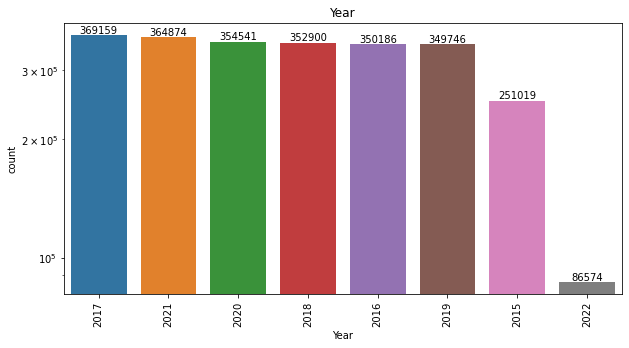

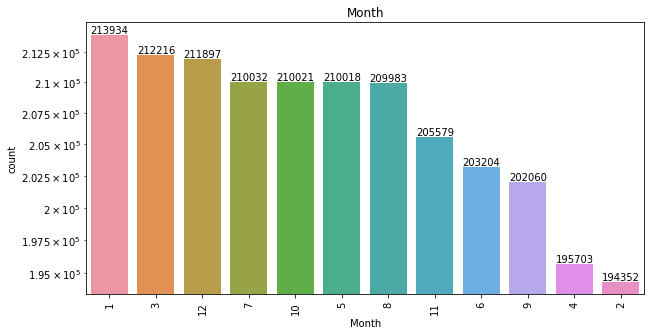

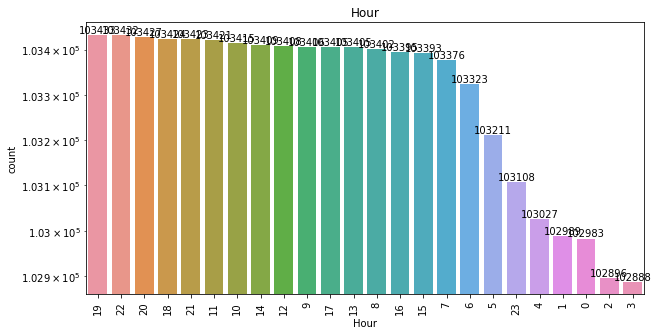

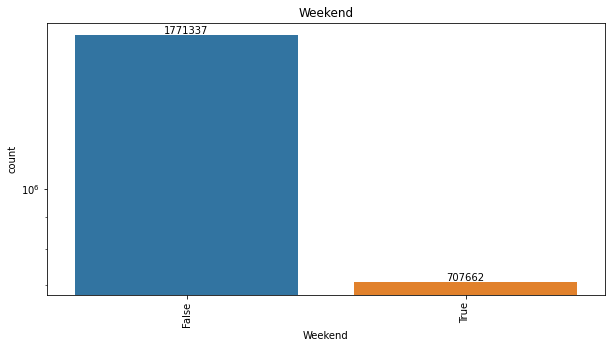

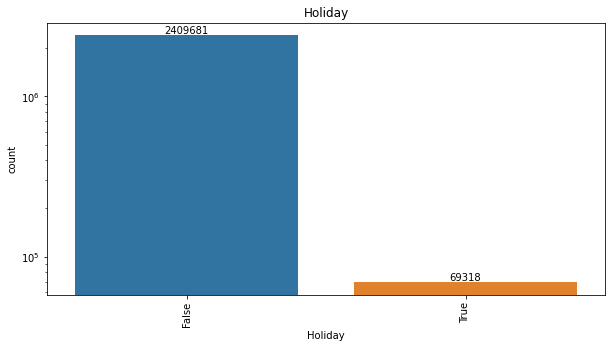

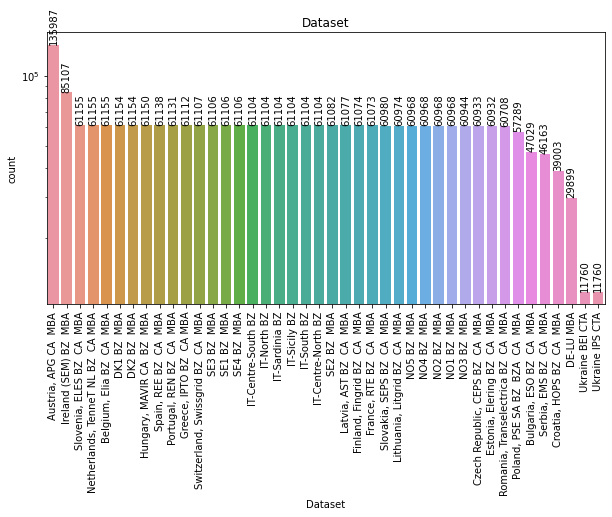

In [8]:
# create a count plot for the columns in for loop
# Countplot: histogram across a categorical (limited possible values), instead of quantitative, variable

for col in ['Year', 'Month', 'Hour','Weekend', 'Holiday','Dataset']:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax = sns.countplot(x=df[col],order = df[col].value_counts().index)
    ax.set_yscale('log')
    abs_values = df[col].value_counts(ascending=False).values
    if(col == 'Dataset'):
        ax.bar_label(ax.containers[0], labels=abs_values,rotation=90)
    else:
        ax.bar_label(ax.containers[0], labels=abs_values)        
    plt.title(col)
    plt.xticks(x=abs_values, rotation=90)
    plt.show()

We create the histogram of the sum of datasets given to us

We can see that most values range from 0 to approximately 4000 with a spike at 300 and then an exponential dicrease

From that we can figure out that most values range around 300 to 3000

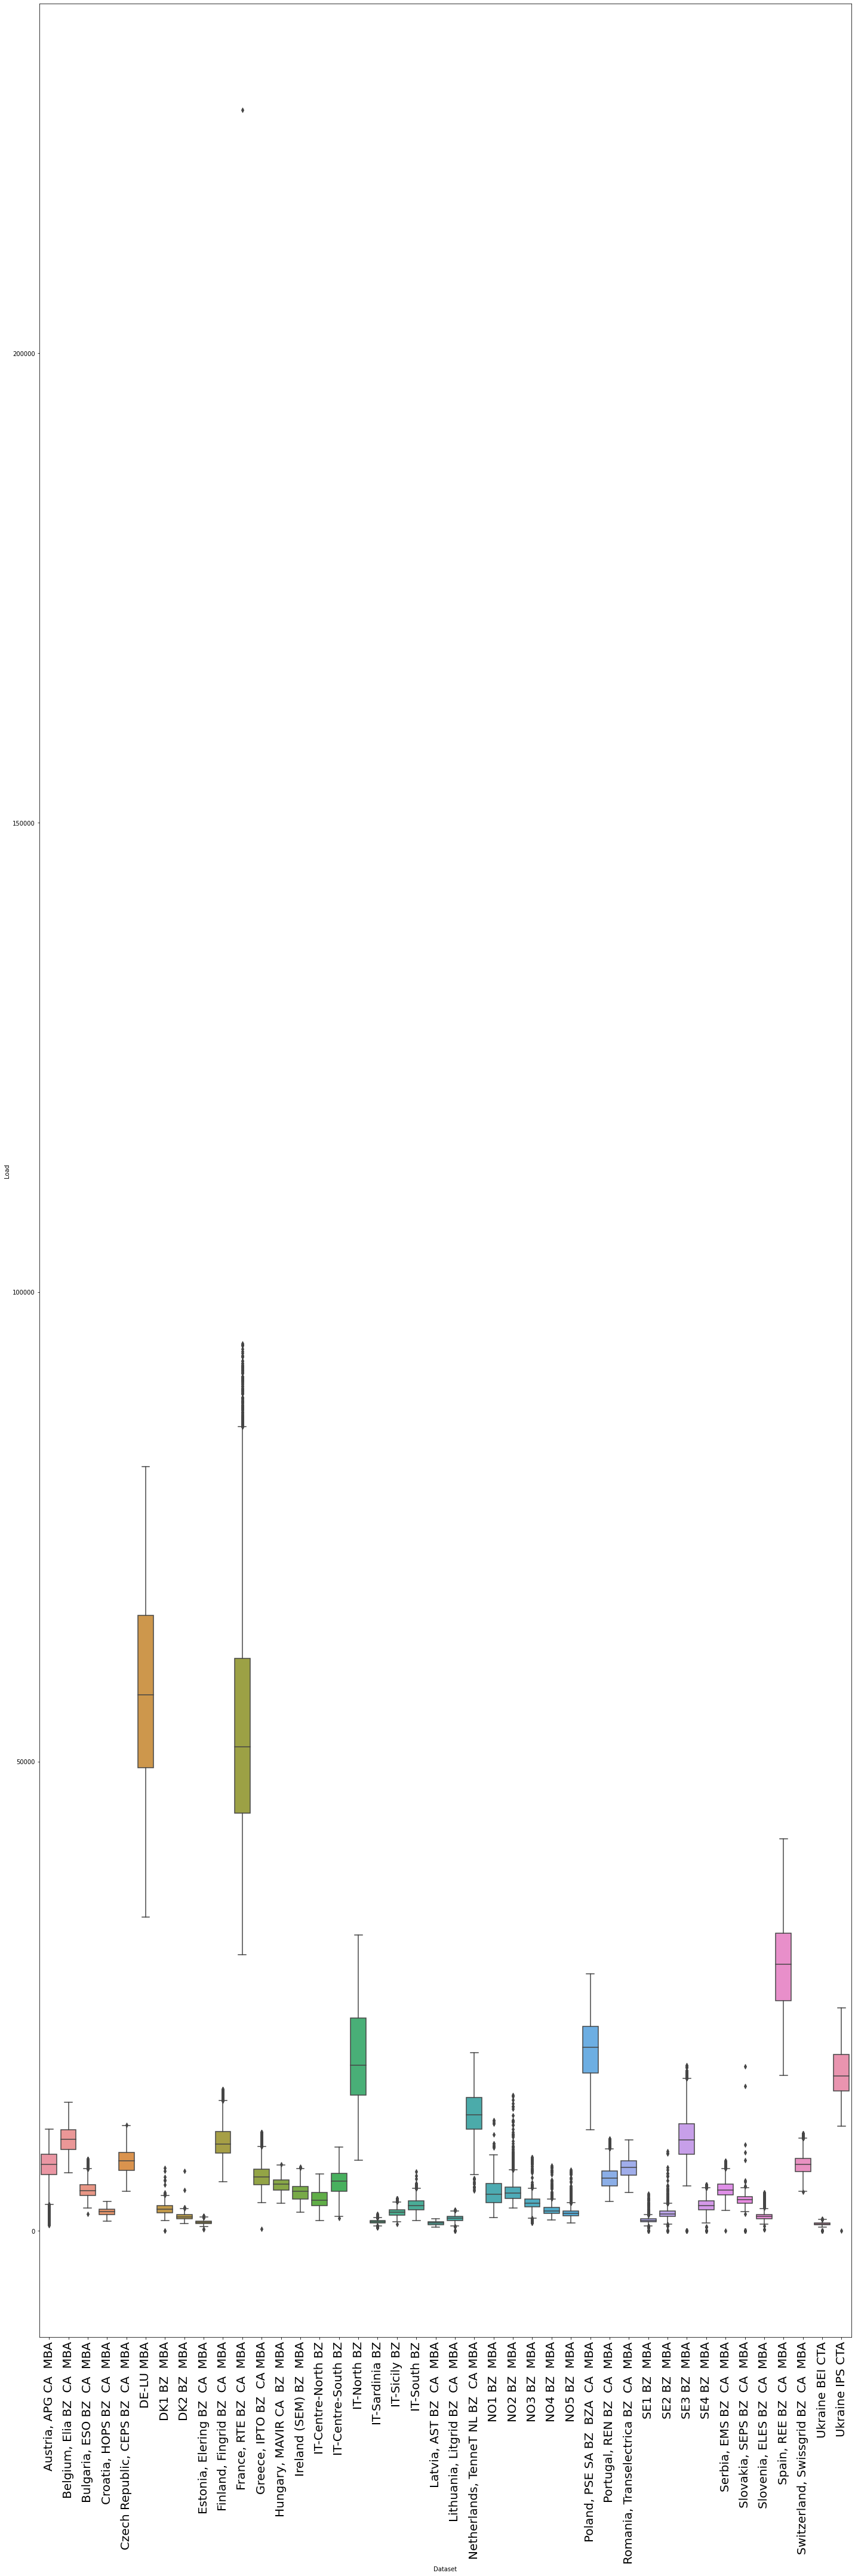

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 60)
ax = sns.boxplot(x='Dataset', y='Load', data=df)
plt.xticks(fontsize=20, rotation=90)
plt.tight_layout()

From that box plot we can see visually which datasets have similar values and their variance, which will be used to determine which ones are going to be grouped together (source) to forecast values of a target with similar values

(0.0, 10000.0)

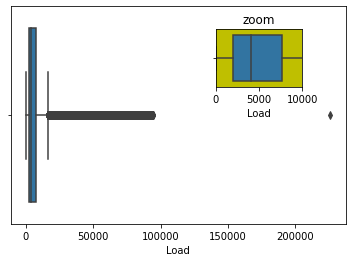

In [10]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=df['Load'])
ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='y')
sns.boxplot(x=df['Load'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0,10000])

Judging from the box plot, we can see a lot of outlier values ranging from 2000 to 10.000

That is a good indicator that most large loads are actually diviation from the usual load distribution
(spikes in power consumtion)

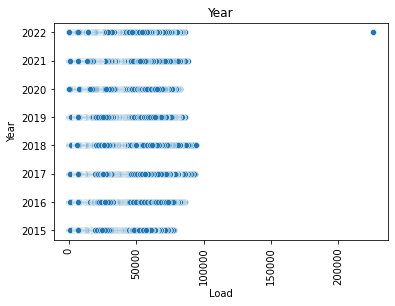

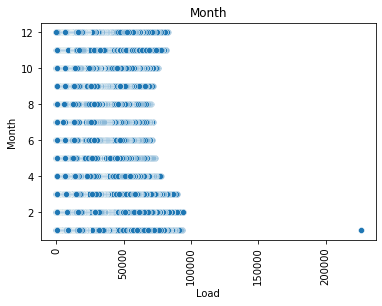

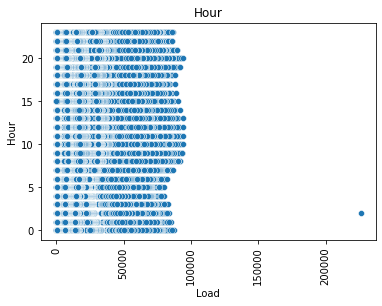

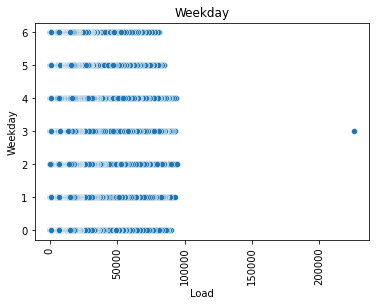

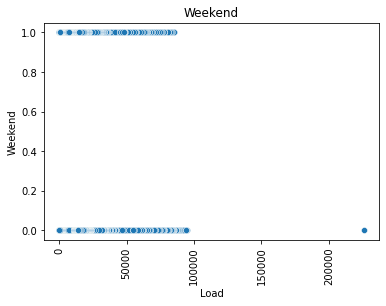

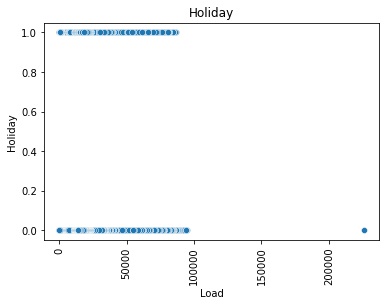

In [11]:
for col in ['Year', 'Month', 'Hour', 'Weekday', 'Weekend', 'Holiday']:
    sns.scatterplot(x=df['Load'], y=df[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

From scatterplots not much further can be deduced

<AxesSubplot:xlabel='Holiday'>

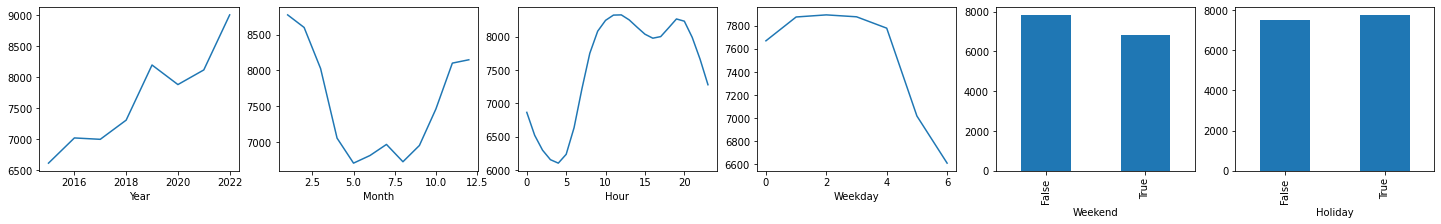

In [12]:
fig, axes = plt.subplots(1, 6)
df.groupby('Year')['Load'].mean().plot(ax=axes[0], figsize=(25, 3))
df.groupby('Month')['Load'].mean().plot(ax=axes[1], figsize=(25, 3))
df.groupby('Hour')['Load'].mean().plot(ax=axes[2], figsize=(25, 4))
df.groupby('Weekday')['Load'].mean().plot(ax=axes[3], figsize=(25, 3))
df.groupby('Weekend')['Load'].mean().plot.bar(ax=axes[4], figsize=(25, 3))
df.groupby('Holiday')['Load'].mean().plot.bar(ax=axes[5], figsize=(25, 3))

We group load based based on a specific variable (x-axis) and plot the mean value

From those graphs we can deduce:
- A upward trend (as year increases, load increases)
- An increase in load demand from September till December and a steady dicrease from January till May (winter months)
- An increase in load demand on business hours (with a slight drop at noon) and proper drop as night approaches
- Load is greater at business days (with significant difference between weekends and not that variant of holidays)

In [13]:
# from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
# from darts.metrics import mape, mase
# from darts import TimeSeries

# df['Start'] = pd.to_datetime(df['Start']).dt.tz_localize(None)
# series = TimeSeries.from_dataframe(df, time_col='Start', 
#                                    value_cols='Load', 
#                                    fill_missing_dates=True, freq='15T')
# series

Loading dataset: Austria, APG CA  MBA


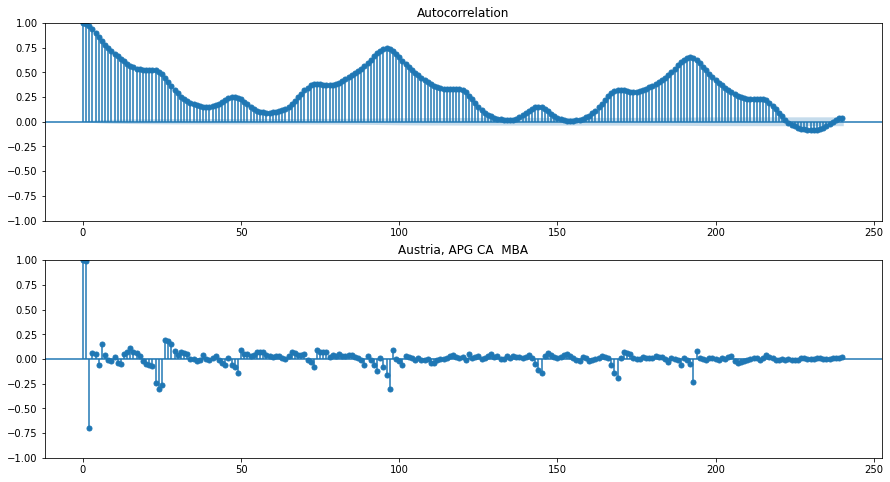

Loading dataset: Belgium, Elia BZ  CA  MBA


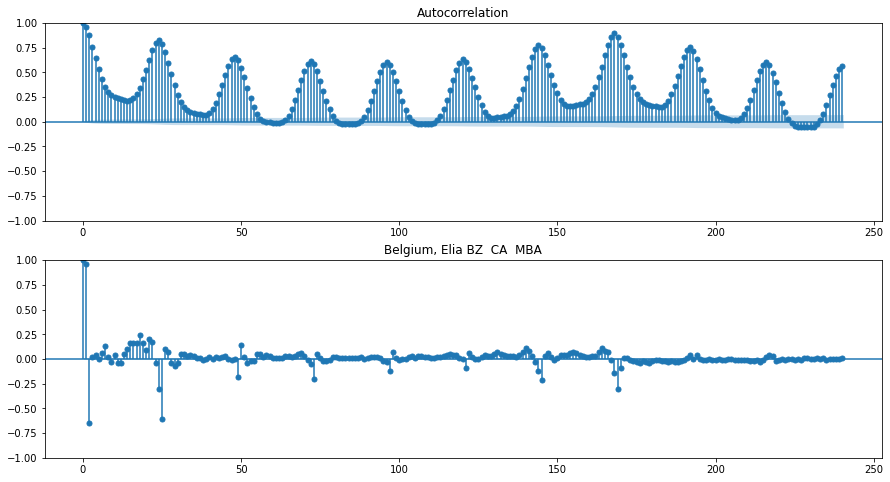

Loading dataset: Bulgaria, ESO BZ  CA  MBA


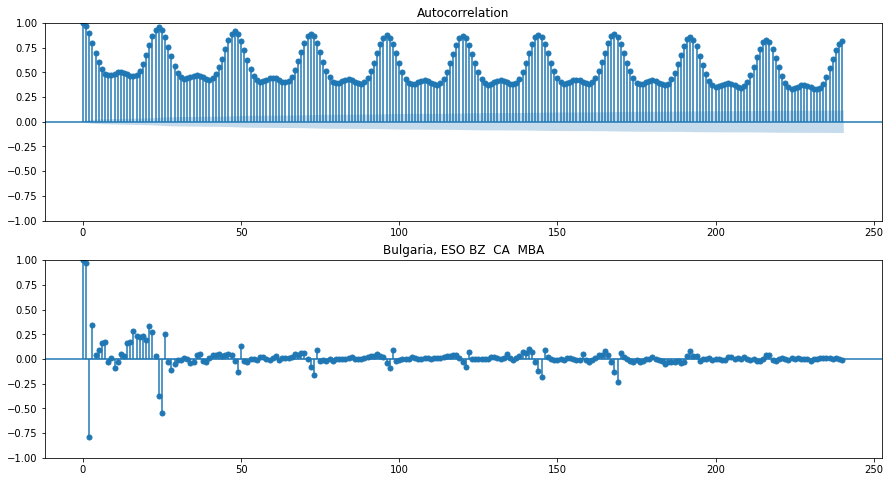

Loading dataset: Croatia, HOPS BZ  CA  MBA


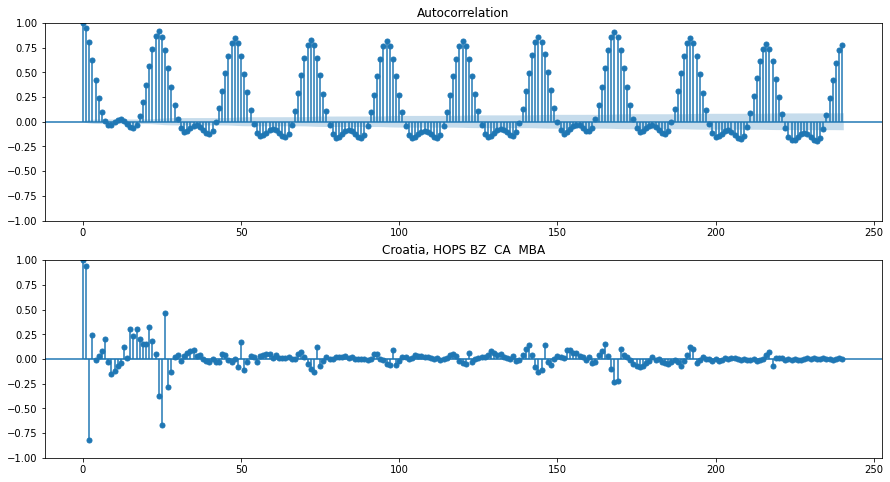

Loading dataset: Czech Republic, CEPS BZ  CA  MBA


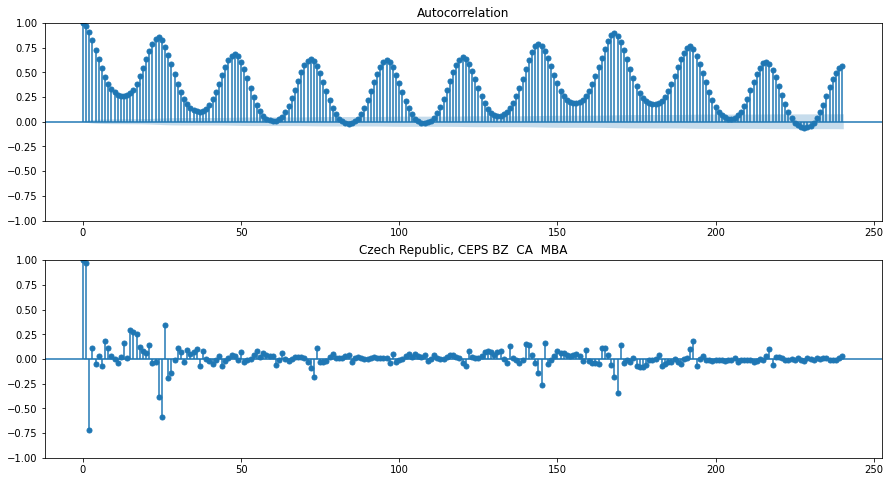

Loading dataset: DE-LU MBA


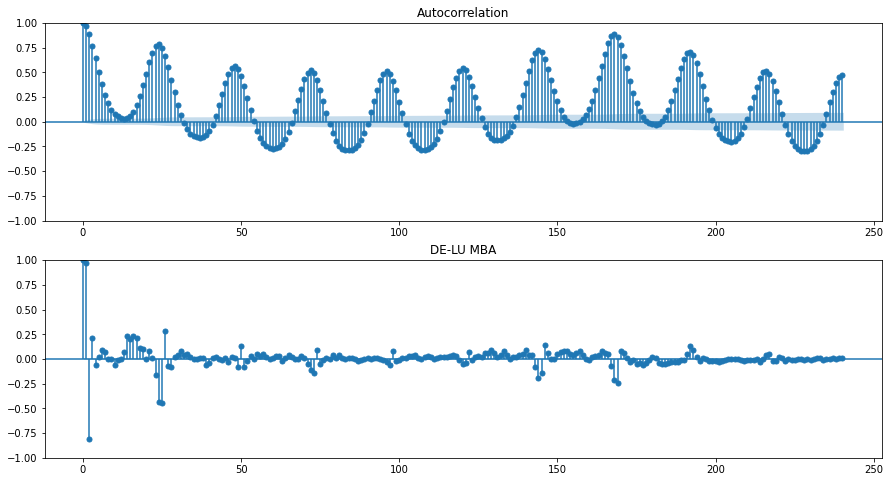

Loading dataset: DK1 BZ  MBA


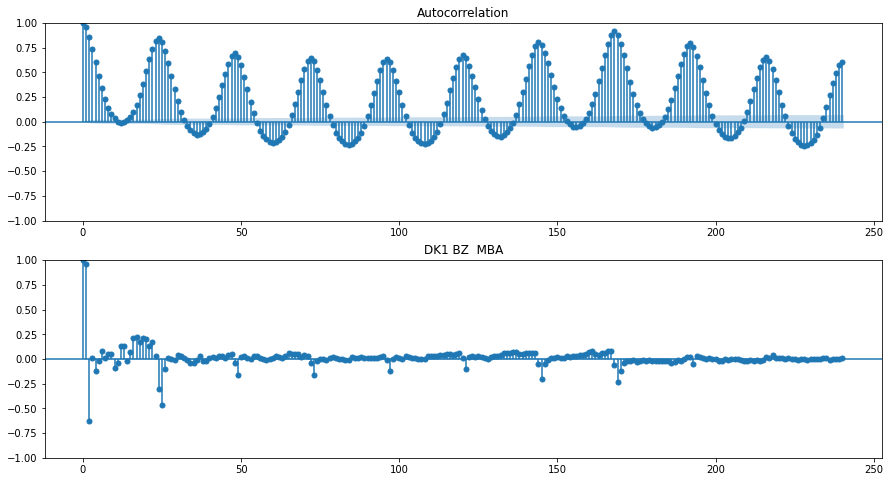

Loading dataset: DK2 BZ  MBA


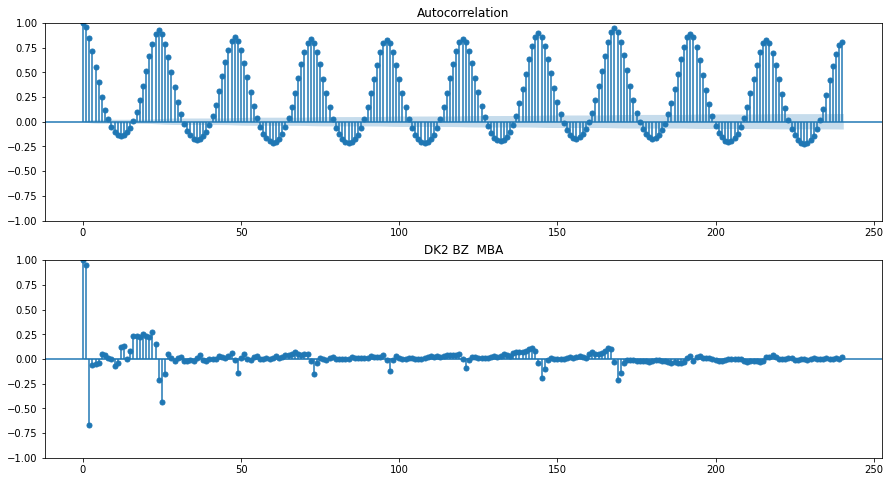

Loading dataset: Estonia, Elering BZ  CA  MBA


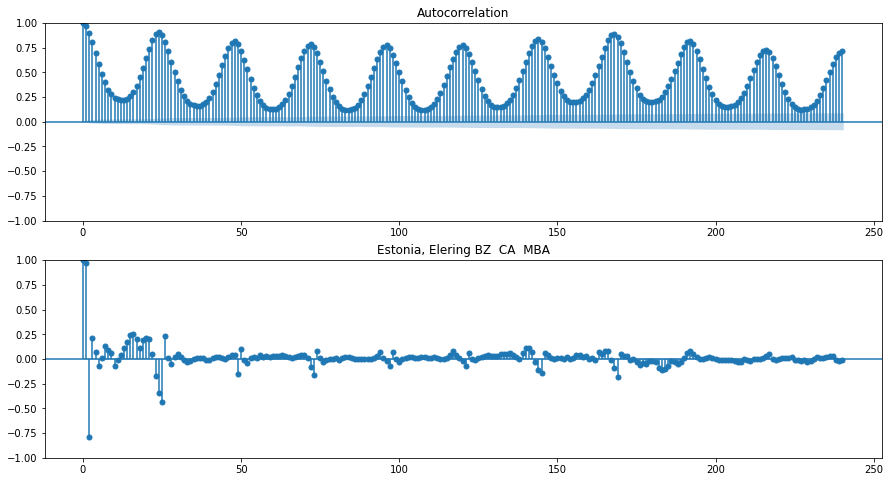

Loading dataset: Finland, Fingrid BZ  CA  MBA


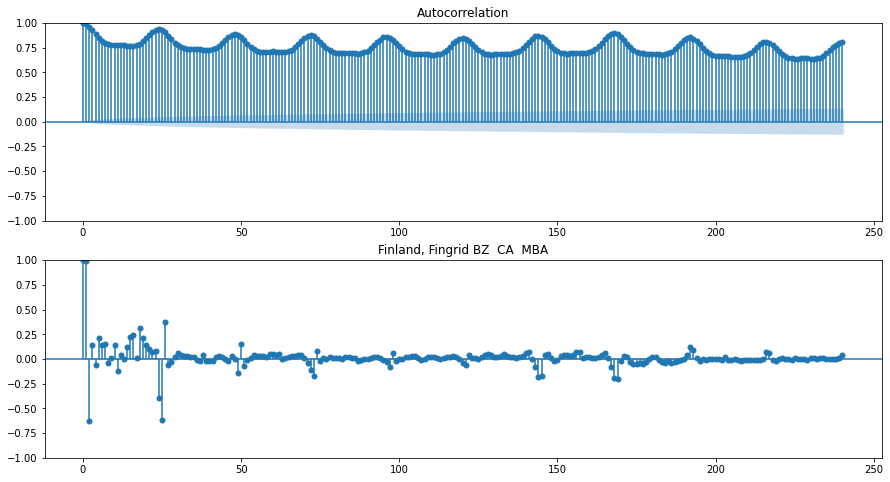

Loading dataset: France, RTE BZ  CA  MBA


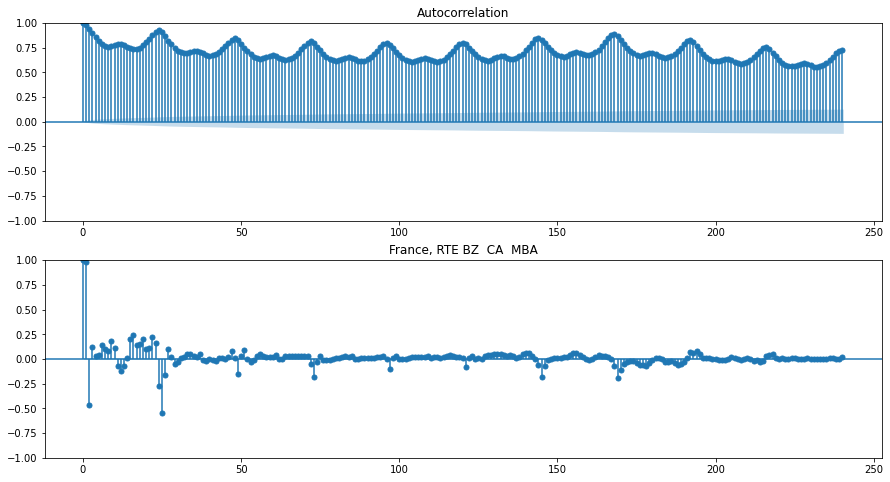

Loading dataset: Greece, IPTO BZ  CA MBA


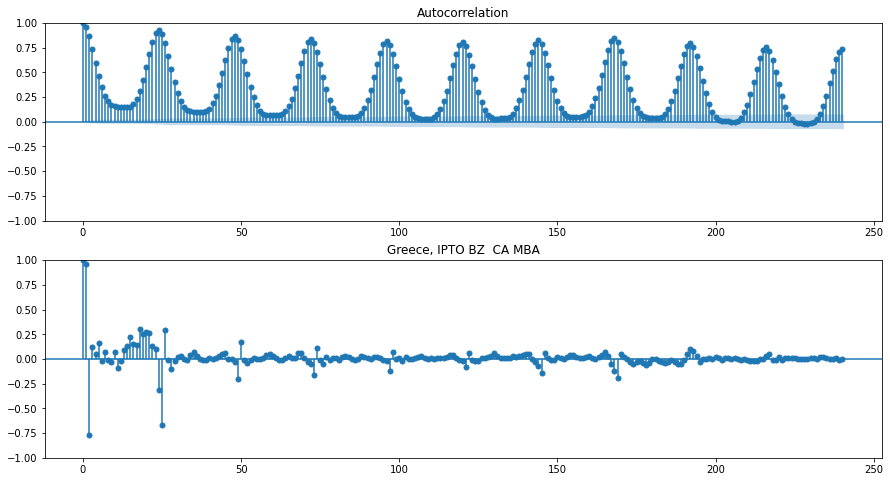

Loading dataset: Hungary, MAVIR CA  BZ  MBA


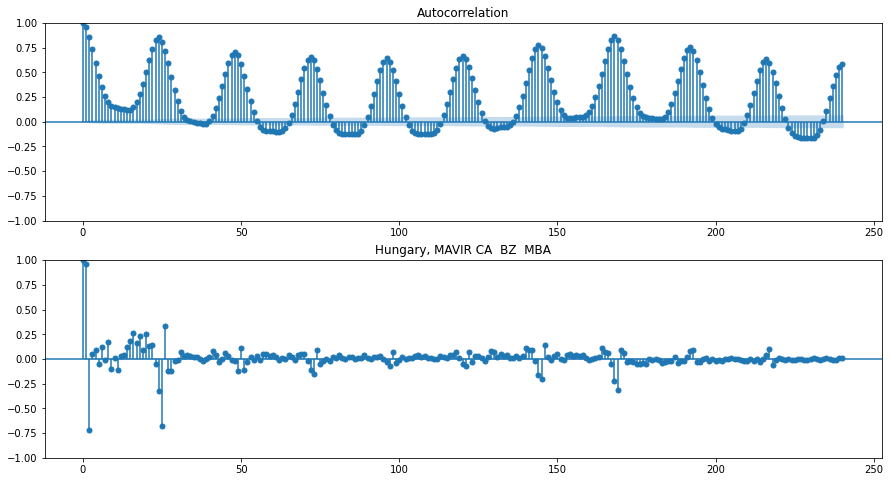

Loading dataset: Ireland (SEM) BZ  MBA


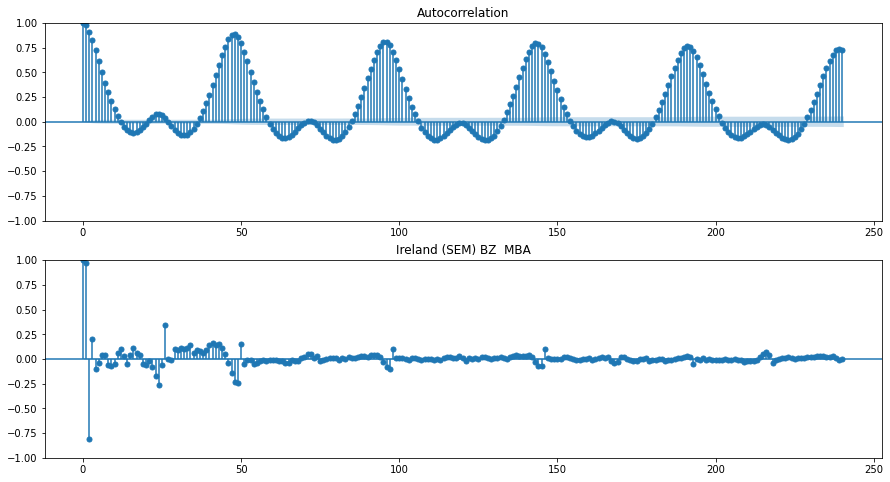

Loading dataset: IT-Centre-North BZ


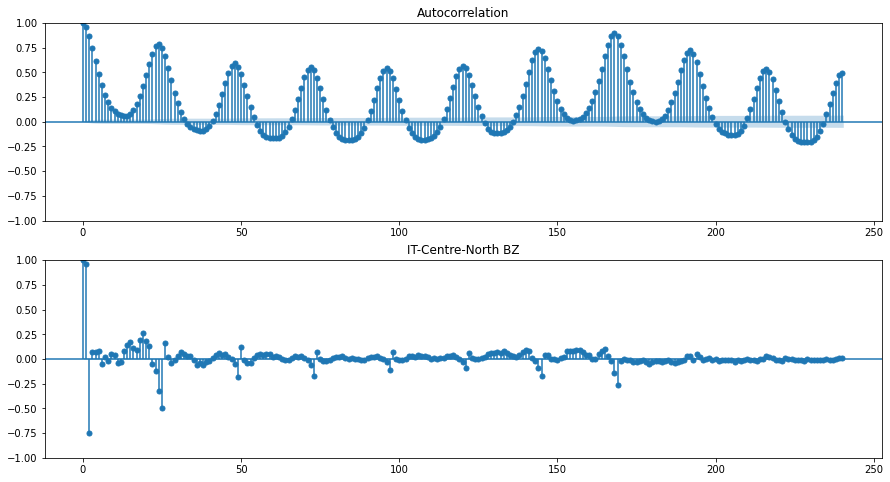

Loading dataset: IT-Centre-South BZ


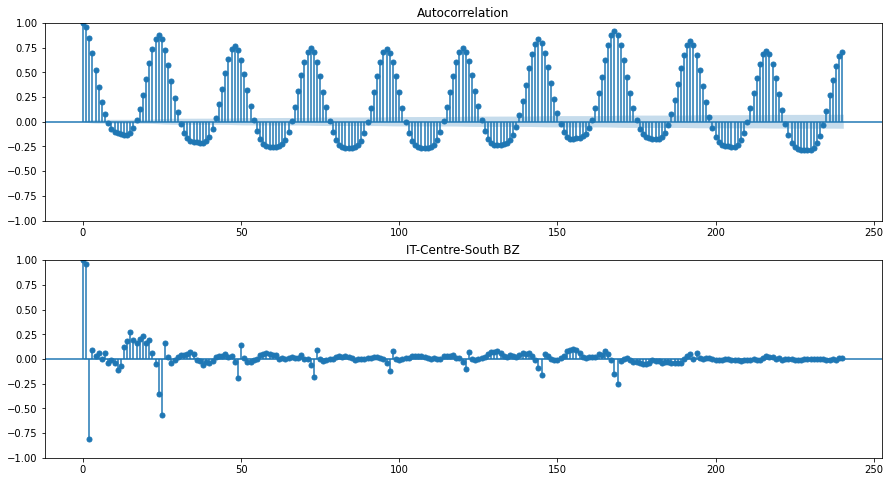

Loading dataset: IT-North BZ


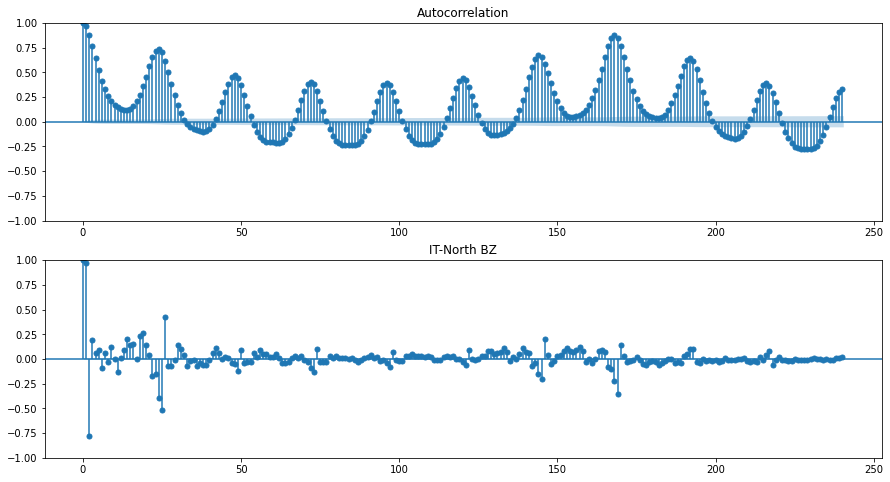

Loading dataset: IT-Sardinia BZ


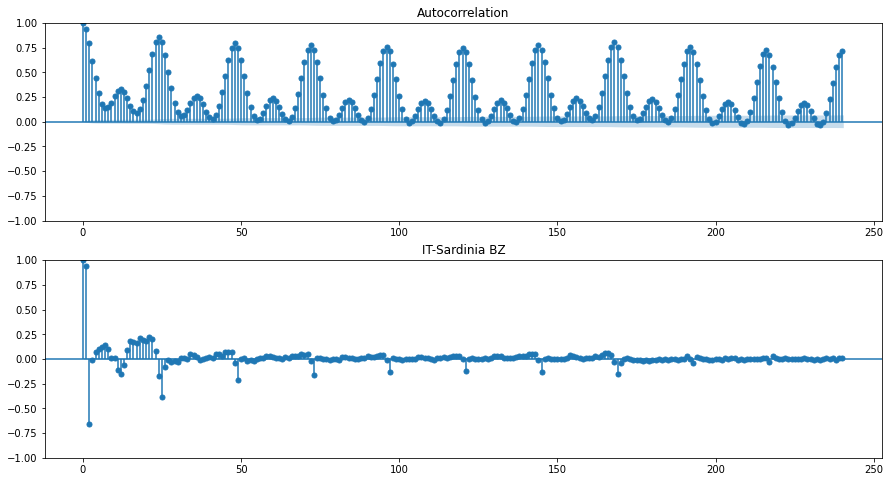

Loading dataset: IT-Sicily BZ


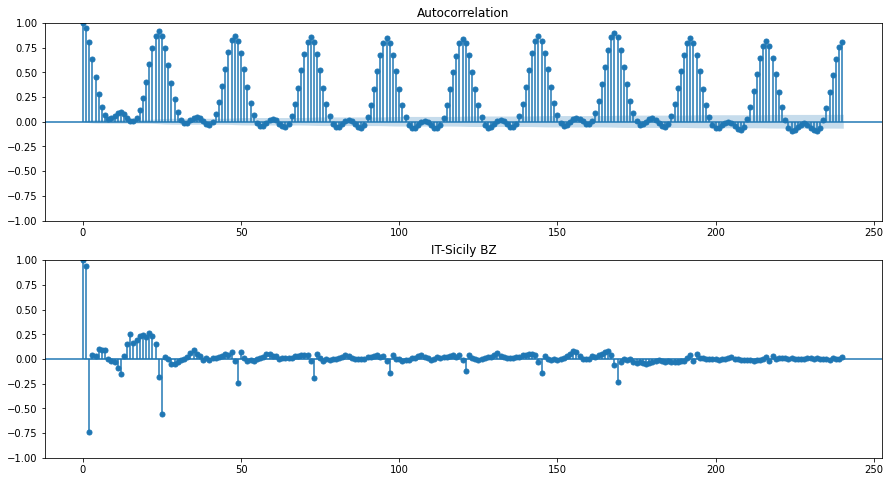

Loading dataset: IT-South BZ


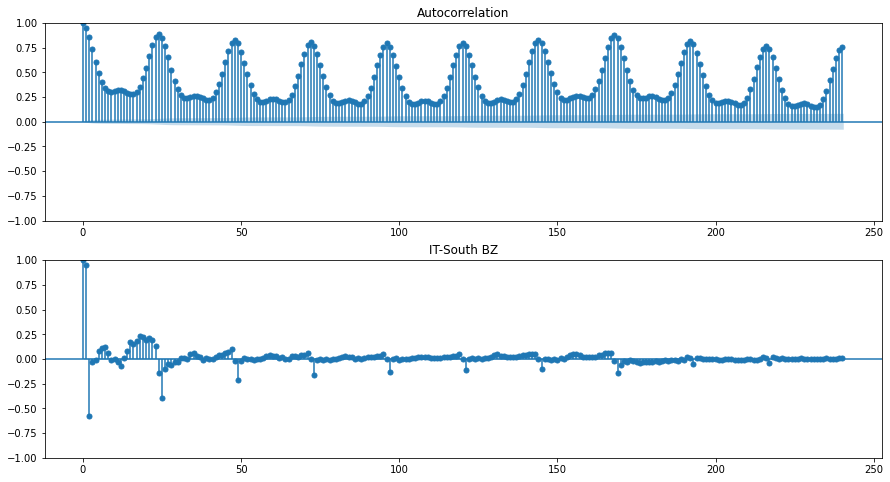

Loading dataset: Latvia, AST BZ  CA  MBA


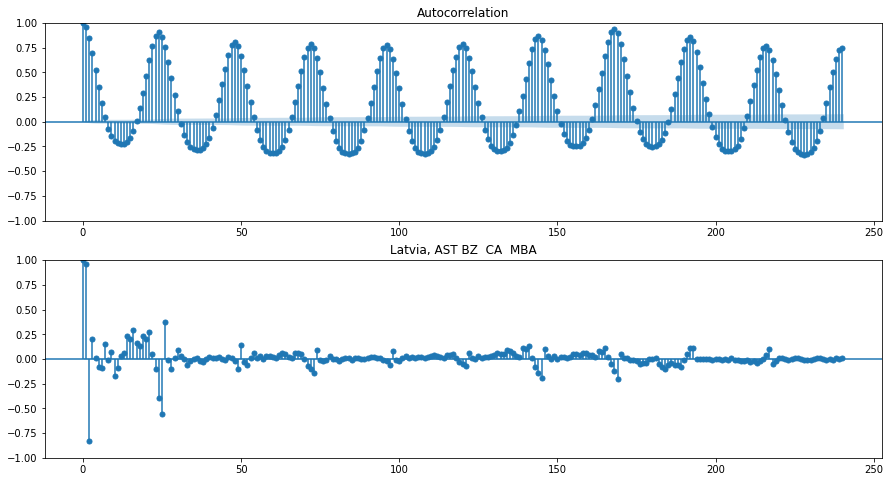

Loading dataset: Lithuania, Litgrid BZ  CA  MBA


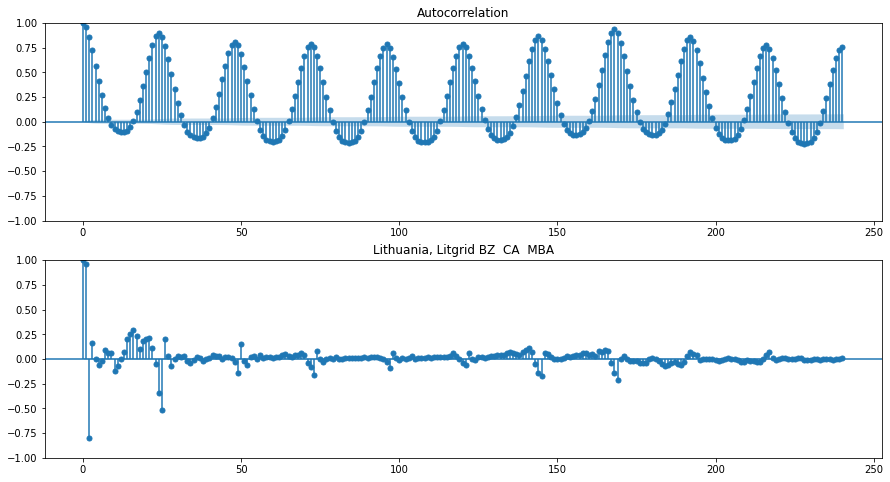

Loading dataset: Netherlands, TenneT NL BZ  CA MBA


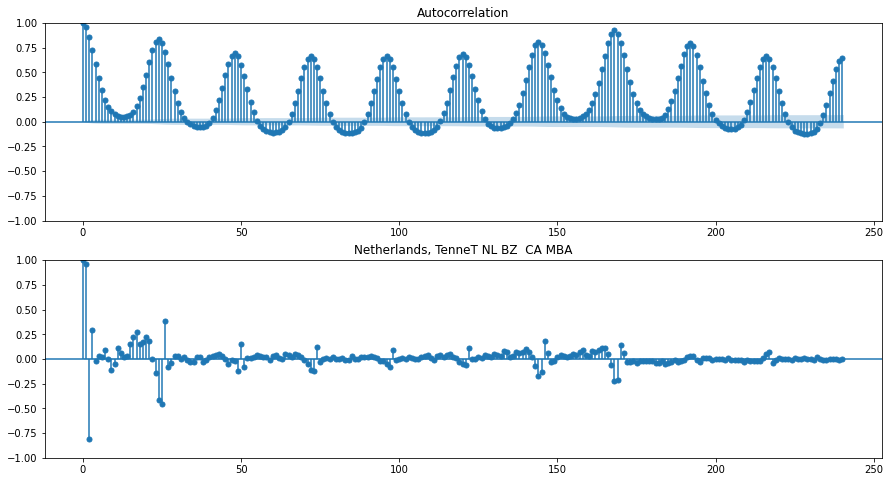

Loading dataset: NO1 BZ  MBA


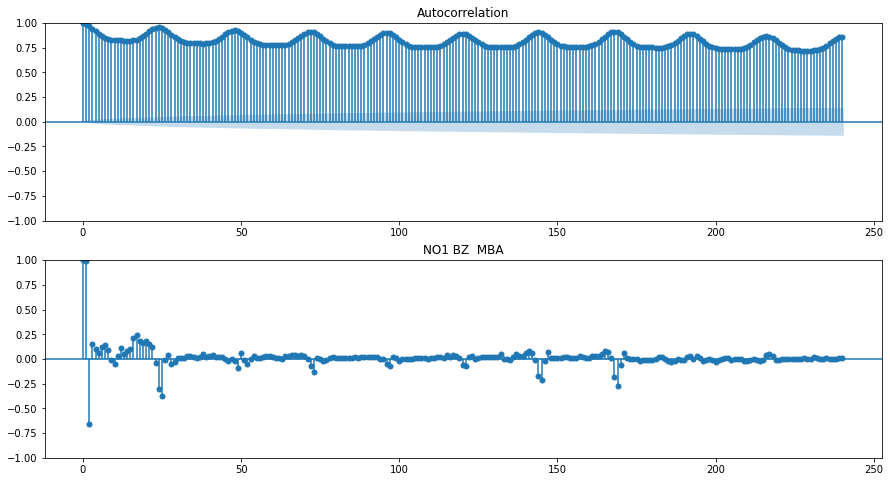

Loading dataset: NO2 BZ  MBA


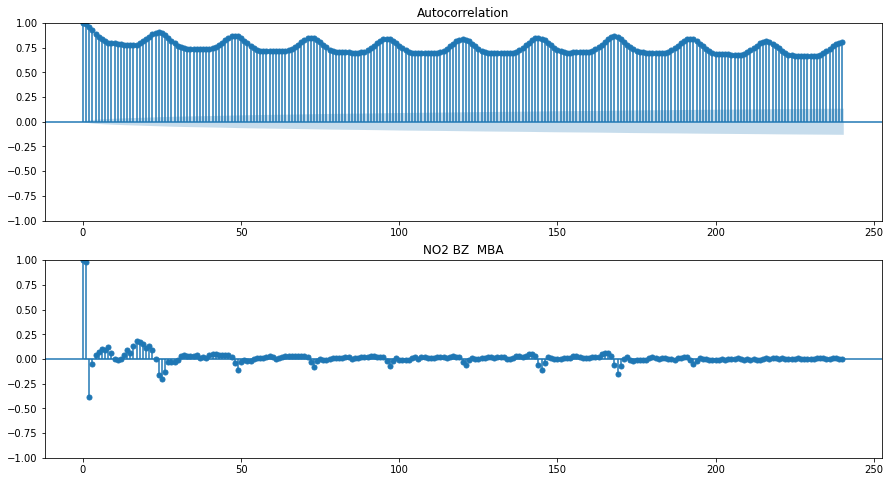

Loading dataset: NO3 BZ  MBA


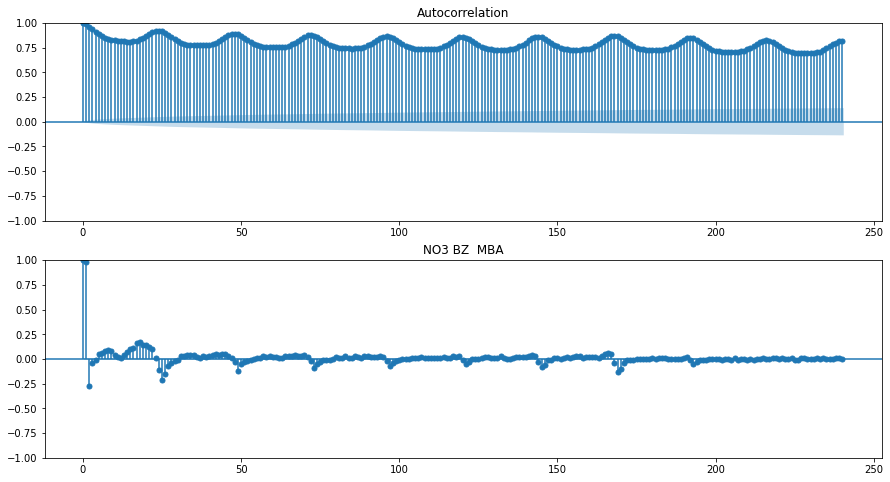

Loading dataset: NO4 BZ  MBA


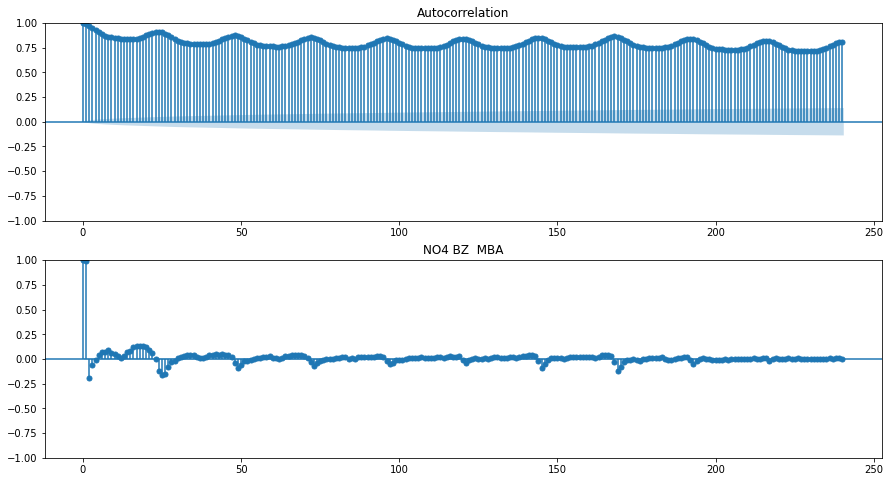

Loading dataset: NO5 BZ  MBA


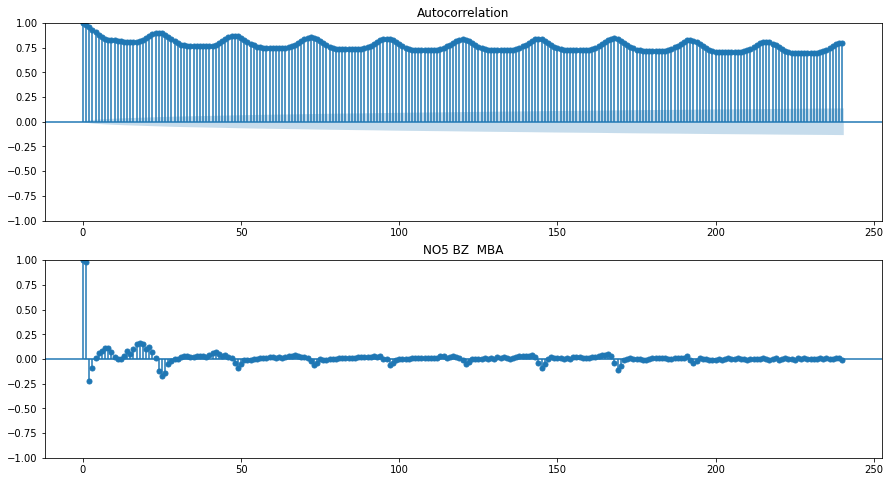

Loading dataset: Poland, PSE SA BZ  BZA  CA  MBA


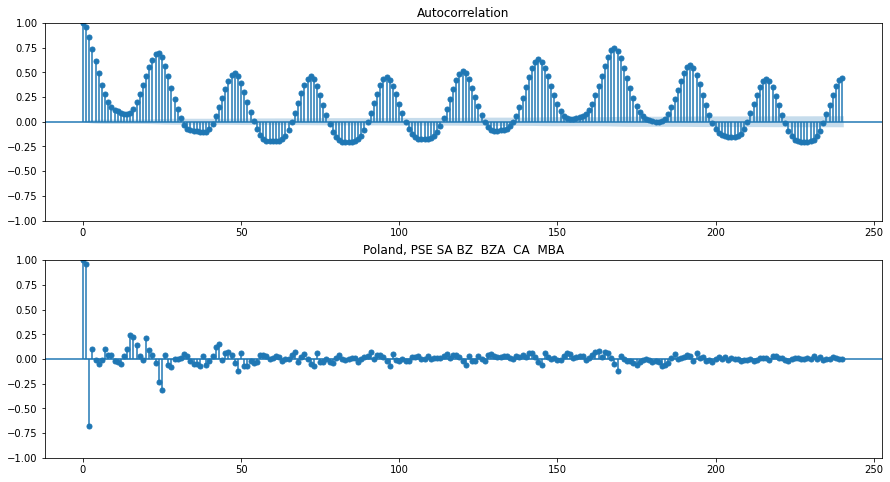

Loading dataset: Portugal, REN BZ  CA  MBA


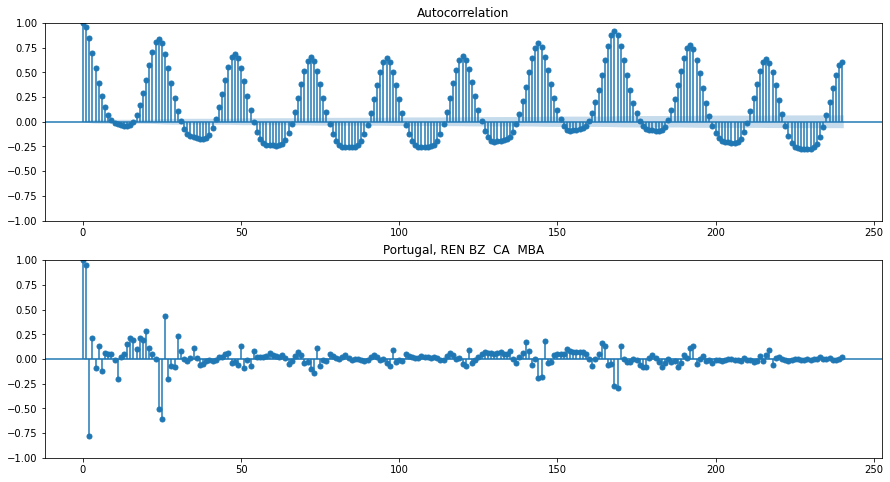

Loading dataset: Romania, Transelectrica BZ  CA  MBA


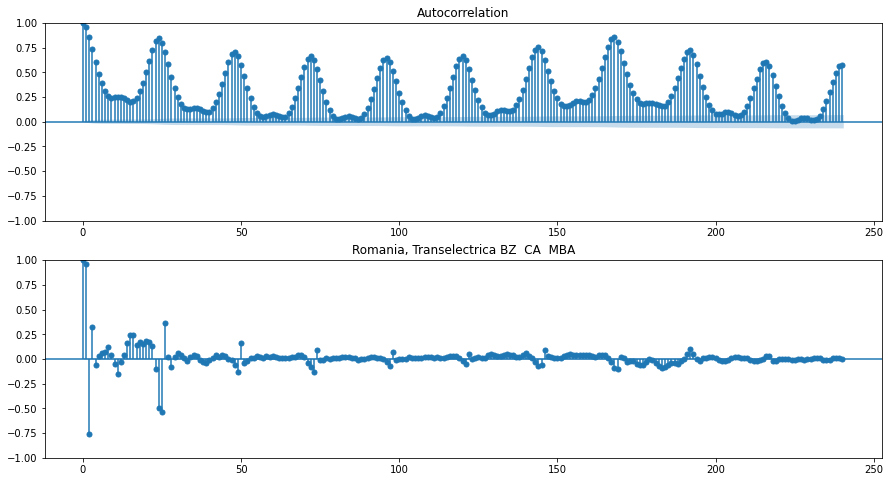

Loading dataset: SE1 BZ  MBA


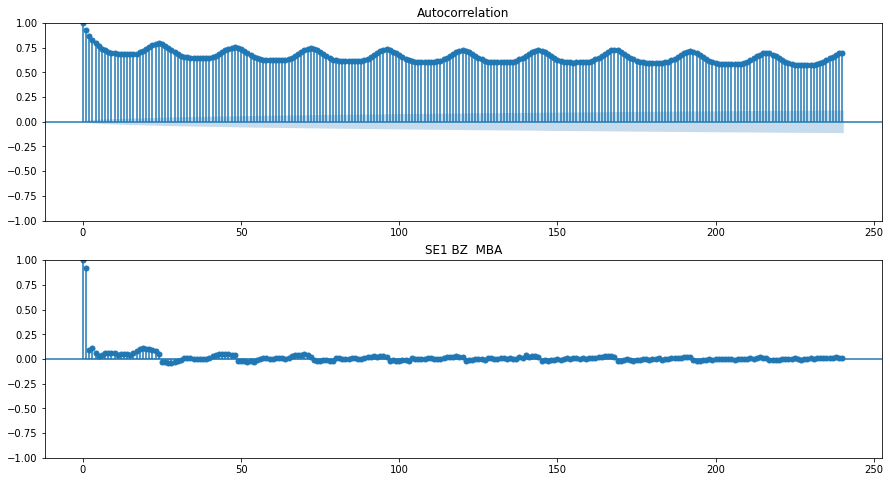

Loading dataset: SE2 BZ  MBA


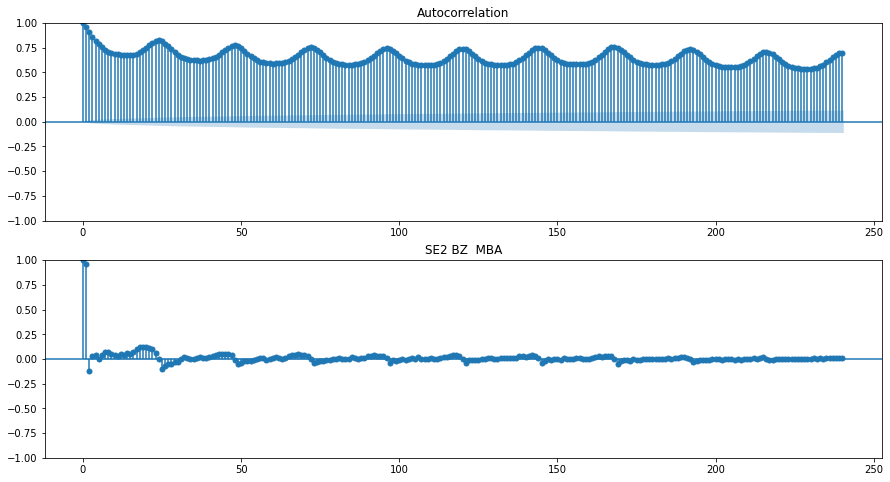

Loading dataset: SE3 BZ  MBA


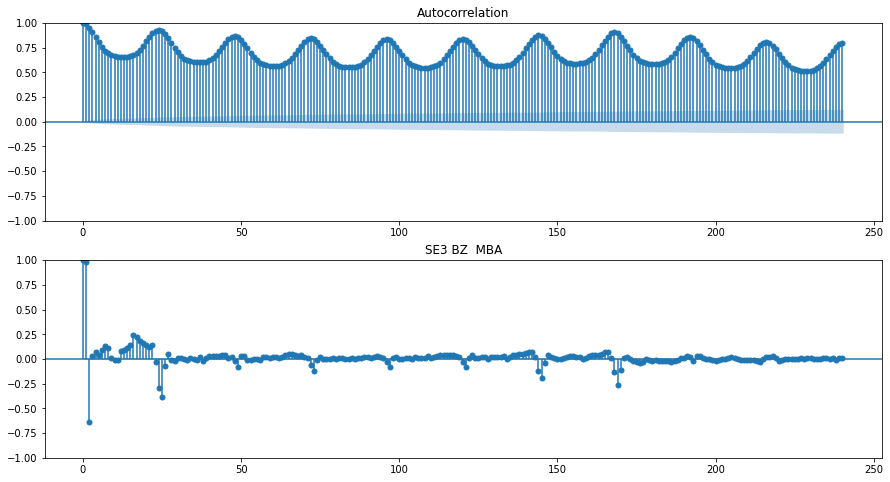

Loading dataset: SE4 BZ  MBA


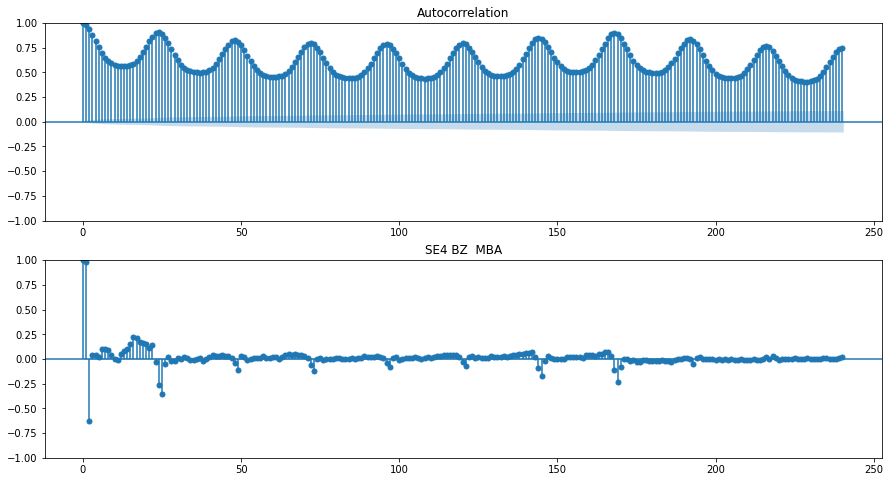

Loading dataset: Serbia, EMS BZ  CA  MBA


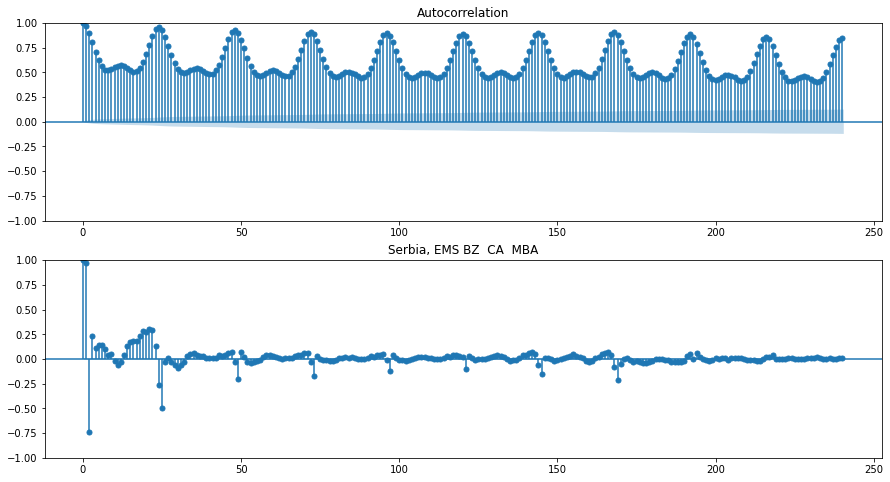

Loading dataset: Slovakia, SEPS BZ  CA  MBA


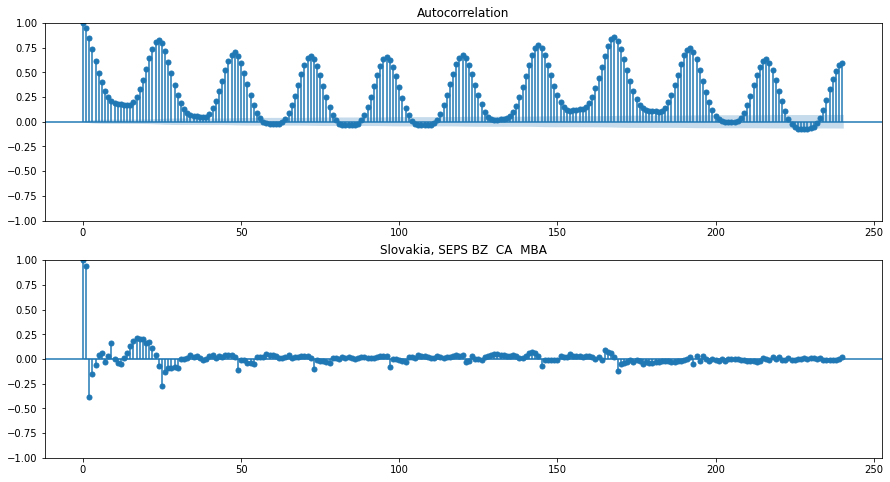

Loading dataset: Slovenia, ELES BZ  CA  MBA


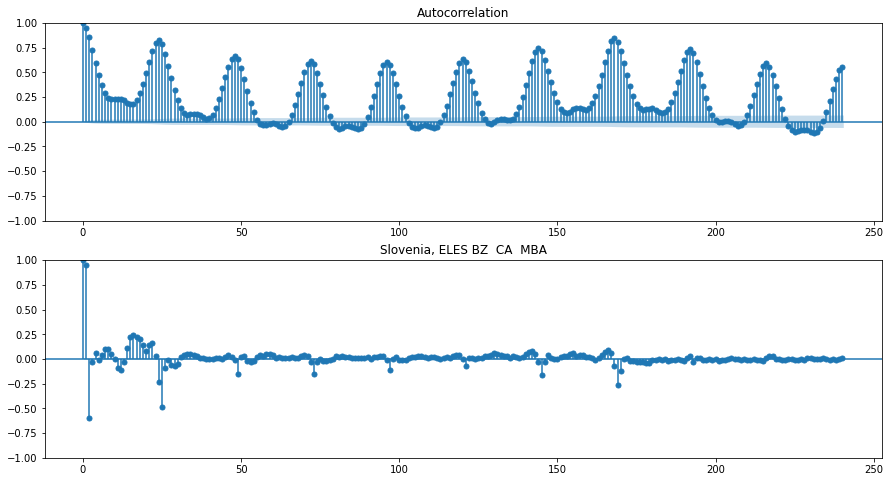

Loading dataset: Spain, REE BZ  CA  MBA


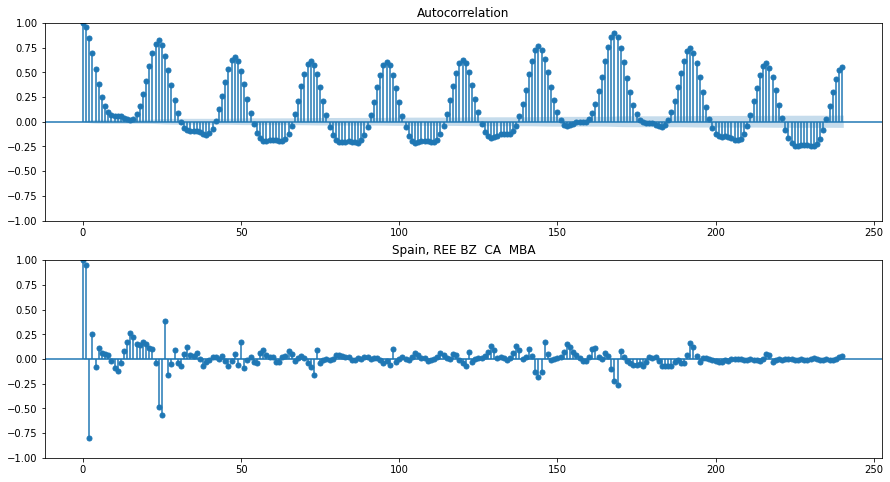

Loading dataset: Switzerland, Swissgrid BZ  CA  MBA


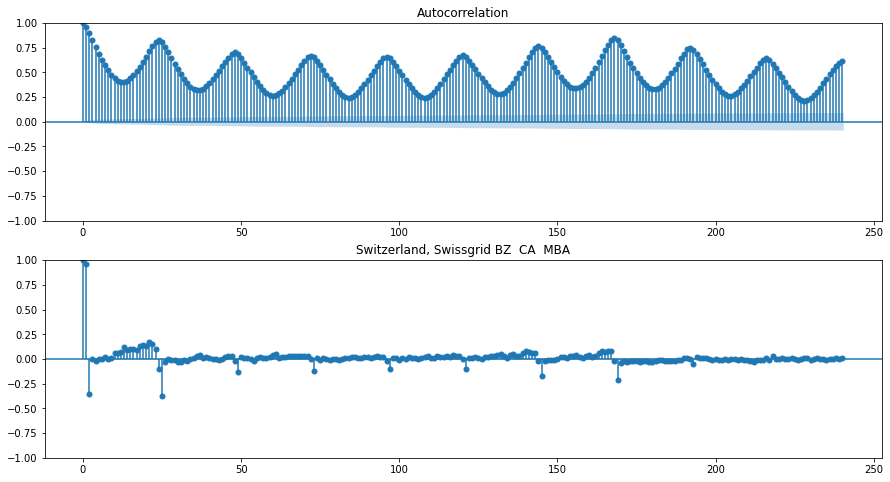

Loading dataset: Ukraine BEI CTA


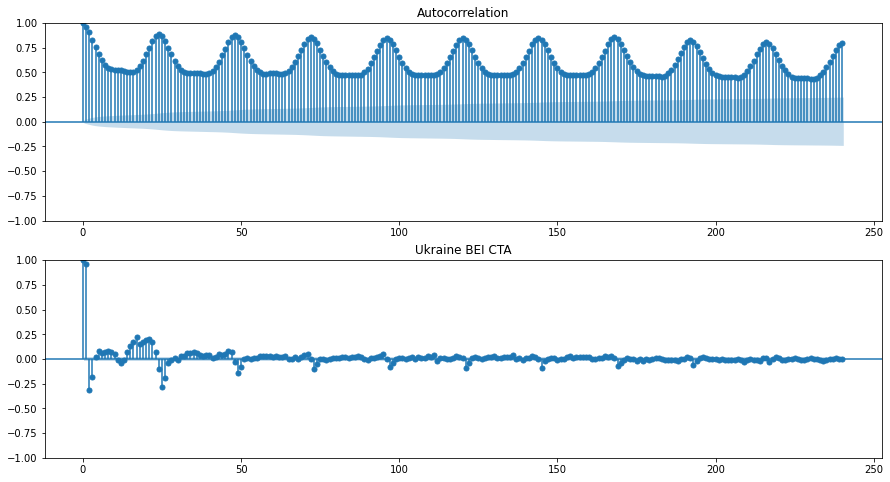

Loading dataset: Ukraine IPS CTA


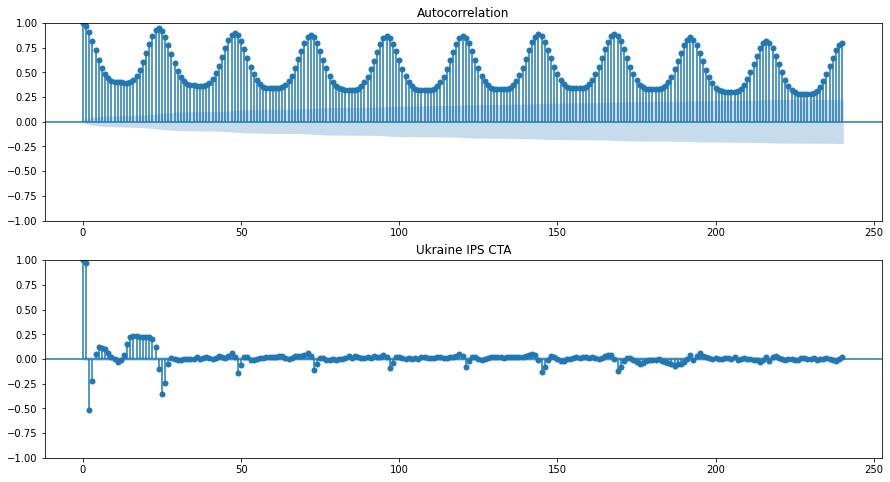

In [14]:
import statsmodels.api as sm

# cannot do it with the entire dataset, so i have to do it for each dataset individually
for csv in pathlib.Path('./Datasets/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv, index_col=0, parse_dates=['Start'], date_parser=dateparse)
    fig, ax = plt.subplots(2,1, figsize=(15, 8))
    fig = sm.graphics.tsa.plot_acf(temp_df['Load'], lags=24*10, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(temp_df['Load'], lags=24*10, ax=ax[1],method='ywm')
    plt.title(csv.stem)
    plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

df_seasonal = df.set_index('Start') #set as index of dataset the datetime column

# 365 days + 48 half-hours of 41 out of 42 datasets (+ similar for the 1st dataset every 15 min)
result = seasonal_decompose(df_seasonal['Load'],  model='additive', period=365*48*41+365*48*2)

f = result.plot()
f.set_figheight(15)
f.set_figwidth(25)
plt.show()

In [ ]:
# Compute the correlation matrix
import numpy as np

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# When we run this cell the report process will be kicked off and 
# analyse all of your data within the dataframe

# https://towardsdatascience.com/pandas-profiling-easy-exploratory-data-analysis-in-python-65d6d0e23650
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report

In [ ]:
pivot_df = df.pivot_table('Load', ['Start'], 'Dataset')
# pivot_df.fillna(0, inplace=True)
# pivot_df.interpolate()
pivot_df.fillna(method="bfill", inplace=True)
pivot_df.fillna(method="ffill", inplace=True)
print('NaN left in pivot table?: '+str(pivot_df.isnull().values.any()))

In [ ]:
pivot_df.head(40)

In [ ]:
pivot_report = ProfileReport(pivot_df
                             #, minimal=True
                            )
pivot_report